## **Self Attention**

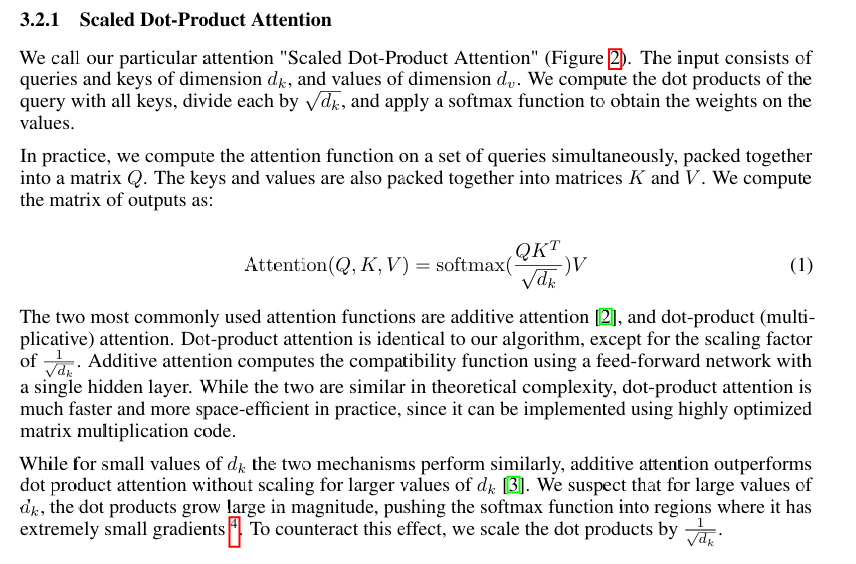

**This is the main formula**

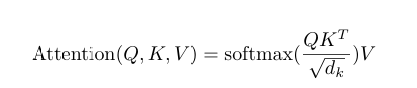

from reading above scaled dot product attention we have get these three things for input ..
**The input consists of queries and keys of dimension dk, and values of dimension dv.**

**queries and keys of dimension dk:**<br>
**q:d_k**<br>
**k:d_k**<br>
**values of dimension d_v:** <br>
**v:d_v**

## lets suppose we have a sentence
**The animal didn't cross the road because it was too tired.**

Now what this **it** is telling in this sentence . As we know in the sentence **it** is telling about animal but how our LLM will know about this ...This is the main reason why self-attention comes into action

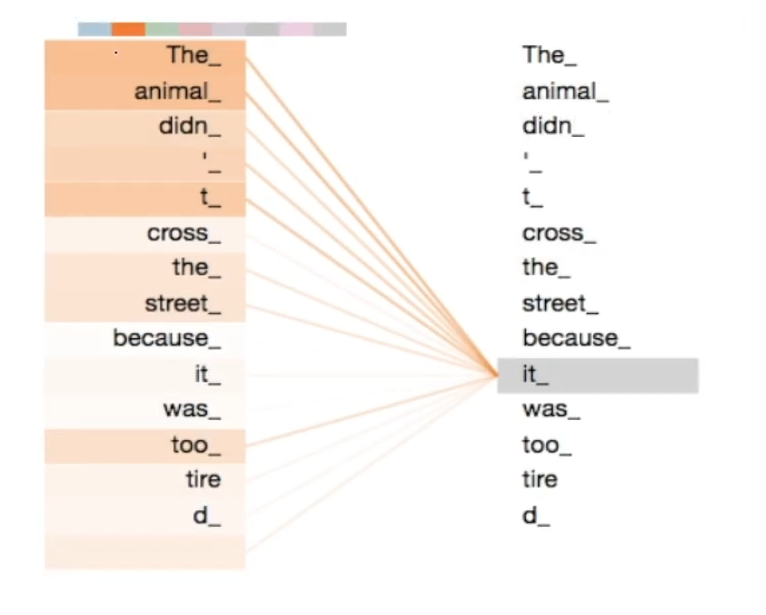

**as according to the research paper attention is all you need we have to take (d_k=d_v=d_model/64)  but it is for multi head attention**<br>
**but we need to take here (d_k=d_v=d_model). as in research paper it is shown that d_model=512 but for example we have take d_model=6 as we have previously taken in our word embedding**

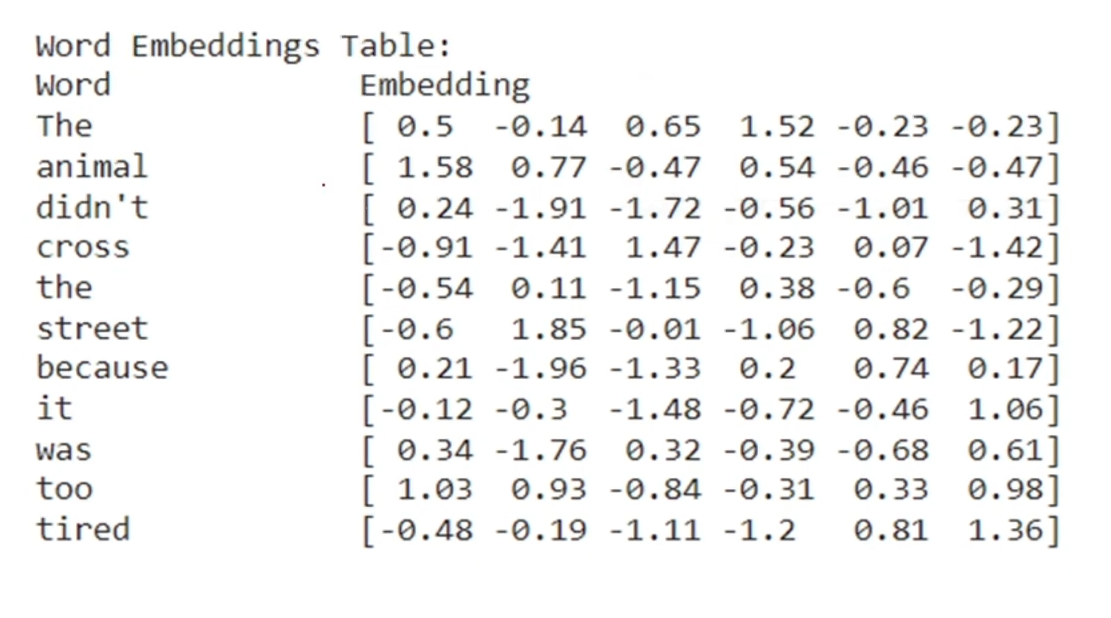

**as in our sentence we have sentence length=11 so for example we are taking max_sequence_length=L=11**

In [1]:
import numpy as np
import math

In [2]:
L=11
d_k=6
d_v=6

In [3]:
q=np.random.randn(L,d_k)
q

array([[ 0.10441417, -0.51223765,  0.98442808,  1.12791952, -0.55898371,
        -1.04879279],
       [ 1.45033048, -0.21973195, -1.0225552 ,  0.76036127,  1.21083842,
        -0.60461522],
       [ 0.10064676, -2.13361488,  0.4338829 , -0.1798815 ,  0.2805556 ,
         0.70623653],
       [ 0.12954062,  0.91116098,  0.67066779, -0.5516415 ,  0.16668146,
         1.86177139],
       [-0.43405285,  1.90499158,  0.44905202, -1.6056918 ,  1.54892829,
        -0.32417744],
       [-0.03669149,  0.57803282,  1.73673979, -1.02759481, -0.34087679,
        -0.16827997],
       [ 1.51640528, -0.60390997,  0.09860774,  0.63764841,  0.23900739,
         1.23205893],
       [-1.52344455, -0.02815031,  0.77163701,  0.46020932, -0.41582488,
         1.01293655],
       [-1.80861889, -0.92006314,  0.78898095, -0.12423849,  0.08079661,
        -1.08168439],
       [-0.03400211,  0.62990252, -1.33434542,  0.93977765, -1.10302349,
         1.19222413],
       [-0.62983819,  1.11210021, -0.74729051, -0.

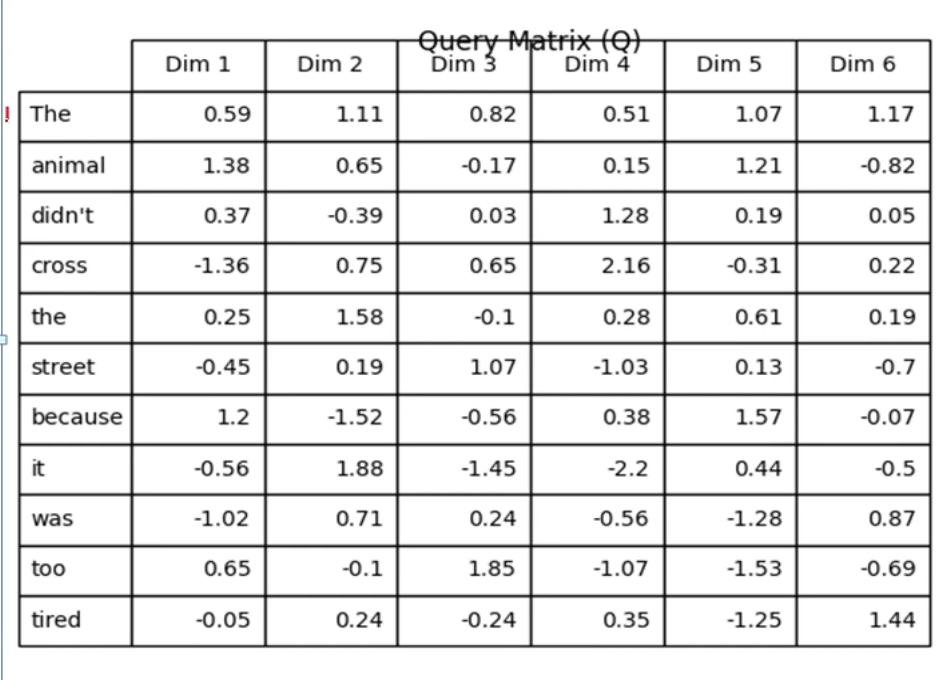

In [4]:
k=np.random.randn(L,d_k)
k

array([[ 0.84162083,  0.78783031, -0.47780385, -0.45159906,  0.3931939 ,
         0.60447136],
       [-0.35141517, -1.01570497, -1.36003526,  0.54440053, -1.14876747,
         0.6450457 ],
       [ 1.55726632,  0.0476663 , -2.01605973, -1.00891839,  0.75548826,
         0.63267403],
       [-1.50786445, -0.22934482, -0.00390127, -0.12017344,  0.56986241,
        -1.20007198],
       [-0.62012756, -0.92858364,  2.31352044,  0.31909635,  0.63639173,
        -0.8003717 ],
       [ 0.59496459,  1.27758224,  1.13946151, -0.26635259,  0.91189798,
         0.19295872],
       [ 0.87479733,  0.70700093,  0.27741613, -0.05992638, -0.82111511,
         1.50332846],
       [ 1.25811493,  0.2549737 ,  1.19922235, -0.37775761, -1.26736229,
         0.71352736],
       [ 0.20966836, -0.40647984, -1.13051507,  1.17549138, -2.50711977,
        -0.14673052],
       [ 0.18830967,  0.31274143,  1.47815193,  0.03999663,  2.04925346,
        -0.66172512],
       [ 0.18242835, -0.53497411,  0.55226466,  2.

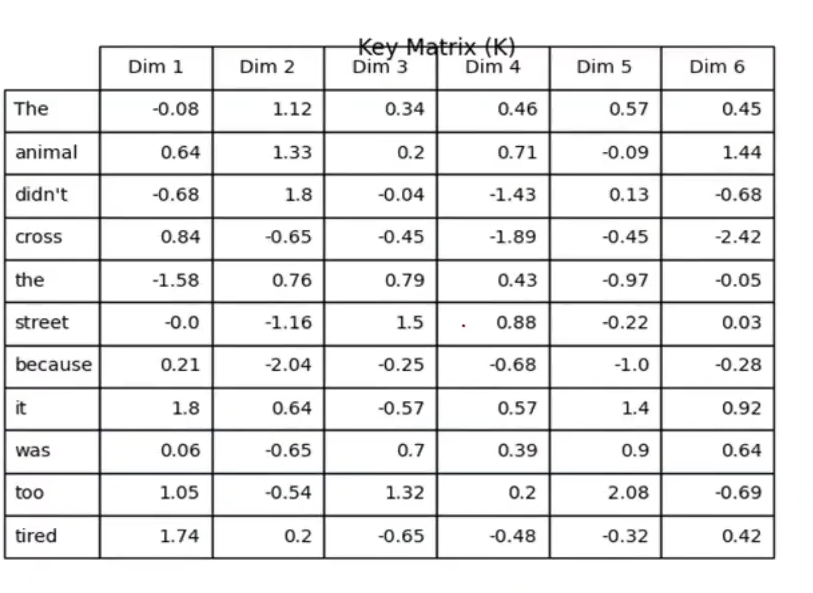

In [5]:
v=np.random.randn(L,d_v)
v

array([[ 7.14173185e-01, -3.89897518e-01, -2.74805070e-01,
        -2.63589152e+00,  6.51343785e-01, -1.44001563e-01],
       [ 2.83360215e-01, -5.88314842e-01,  1.66252612e+00,
         9.66788207e-01,  3.53757093e-01, -7.55221120e-01],
       [-4.00019255e-01, -4.95048912e-01, -9.19193578e-01,
         7.44291998e-01,  1.93781934e-02, -9.42862226e-02],
       [ 6.33208730e-01,  6.19884933e-04, -1.34235179e+00,
         2.07448338e+00,  6.19251404e-01,  1.64050154e+00],
       [-4.37955863e-01,  3.23798012e-01,  6.23444202e-01,
         1.37668716e+00,  6.04163657e-01, -9.58096669e-01],
       [ 1.67639033e+00, -1.37387681e+00, -1.37773213e+00,
         2.96130440e-01,  1.61728793e+00, -3.28869264e-01],
       [-1.18128919e+00,  1.35778796e-01,  1.01567556e+00,
        -4.98987343e-01, -7.30321526e-01, -1.85047410e-01],
       [ 6.95272764e-02,  7.29060823e-01,  6.83779548e-01,
         2.02791843e+00,  5.05964935e-02,  1.21402557e+00],
       [-1.19302920e+00,  4.66952551e-01, -2.582

**Now we have to make the formula in our code <br>**

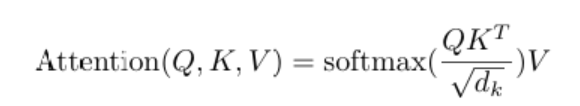


**Now understand why we are taking transpose of k**
**as the shape of q => (11,6) , and k => (11,6)**<br>

so for scaler dot product we are making it transpose of k => k.T shape =>(6,11) . So we can easily dot product k with q

In [9]:
q.shape ,k.shape


((11, 6), (11, 6))

In [12]:
k=k.T
k.shape
# now this is the shape of  of k

(6, 11)

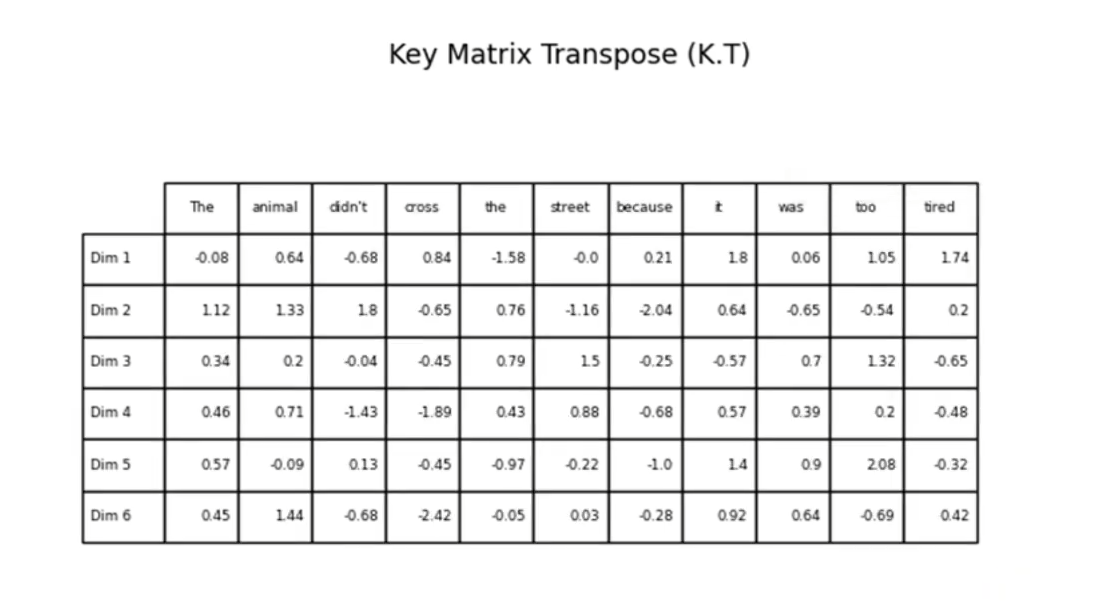

In [14]:
at=np.matmul(q,k)
at.shape


(11, 11)

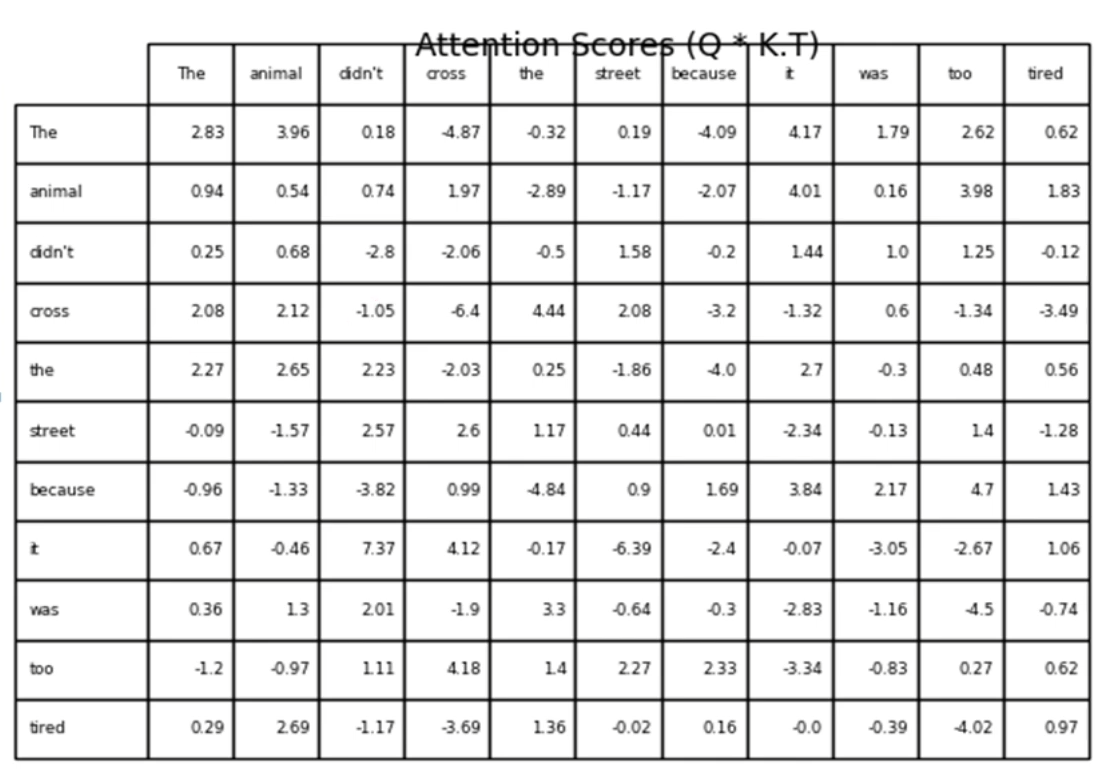

## Now understand why we are dividing by underroot d_k

In [16]:
q.var(),k.var(),at.var()

(np.float64(0.8704311857141714),
 np.float64(0.9889306257416233),
 np.float64(5.697386305659939))

so the variance of q , k is much lower than at var

that's why we are dividing at by underroot d_k . Now in code i am showing you after dividing by this underroot d_k what it affect on our at

In [17]:
scaled=at/math.sqrt(d_k)
scaled.var()

np.float64(0.9495643842766566)

as you can see the differnce in var after dividing :

np.float64(5.697386305659939) -> np.float64(0.9495643842766566)

In [18]:
scaled

array([[-0.87739266, -0.11251498, -1.66169708,  0.31056802,  1.44193555,
        -0.19723259, -0.4829566 ,  0.29202752,  0.81583707,  0.3707812 ,
         2.08821027],
       [ 0.5320867 , -0.10729146,  1.66349615, -0.32998721, -0.63847575,
         0.08245737, -0.45683696, -0.69844227, -0.20566904,  0.65512249,
         0.93062935],
       [-0.48380857,  0.6438045 ,  0.00839284, -0.13478744,  1.01184951,
        -0.70691044, -0.18695297,  0.13032783, -0.25335863,  0.03814193,
        -0.02622052],
       [ 0.79464022, -0.47927927,  0.30758901, -1.012414  , -0.38166253,
         1.08738074,  1.48545821,  1.03088599, -0.99650426,  0.15849354,
        -1.64847616],
       [ 0.84064262, -2.14563479,  0.44689421,  0.6860673 ,  0.11101592,
         1.82274971, -0.23322143, -0.45301389, -2.89703878,  1.83803231,
        -1.85878355],
       [-0.07225984, -1.31154968, -1.16685215,  0.01925555,  1.26305415,
         1.07205555,  0.38655839,  1.17742156, -1.03477892,  0.86252353,
        -0.631

## Softmax function

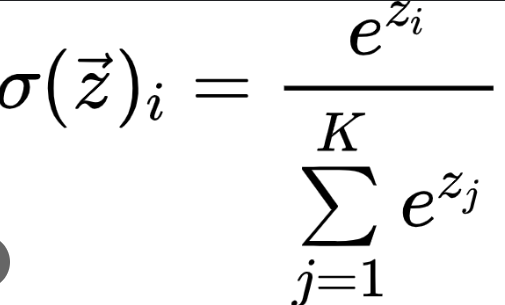

In [20]:
def softmax(x):
  return (np.exp(x).T/np.sum(np.exp(x),axis=-1)).T

In [21]:
attention=softmax(scaled)
attention

array([[0.01920874, 0.04127442, 0.00876758, 0.06301204, 0.19533057,
        0.03792176, 0.02849707, 0.06185453, 0.10443813, 0.06692275,
        0.37277241],
       [0.10244995, 0.05405469, 0.31759719, 0.04326312, 0.0317792 ,
        0.06534919, 0.03810901, 0.02992953, 0.04899012, 0.1158632 ,
        0.1526148 ],
       [0.04969539, 0.15347309, 0.08129736, 0.07045212, 0.22175435,
        0.03975797, 0.06687116, 0.09184006, 0.06257477, 0.08375222,
        0.07853153],
       [0.12900501, 0.03608697, 0.07926526, 0.02117449, 0.03978733,
        0.17287897, 0.25740976, 0.16338298, 0.02151406, 0.06828598,
        0.0112092 ],
       [0.10926402, 0.0055151 , 0.07370118, 0.09361511, 0.05267497,
        0.29174328, 0.03733395, 0.02996742, 0.00260149, 0.29623612,
        0.00734736],
       [0.05484421, 0.01588232, 0.01835504, 0.06010013, 0.20847322,
        0.17222676, 0.08677467, 0.19136411, 0.02094662, 0.13966964,
        0.03136327],
       [0.10216723, 0.08363029, 0.1631484 , 0.01398279, 0.

In [22]:
attention.shape

(11, 11)

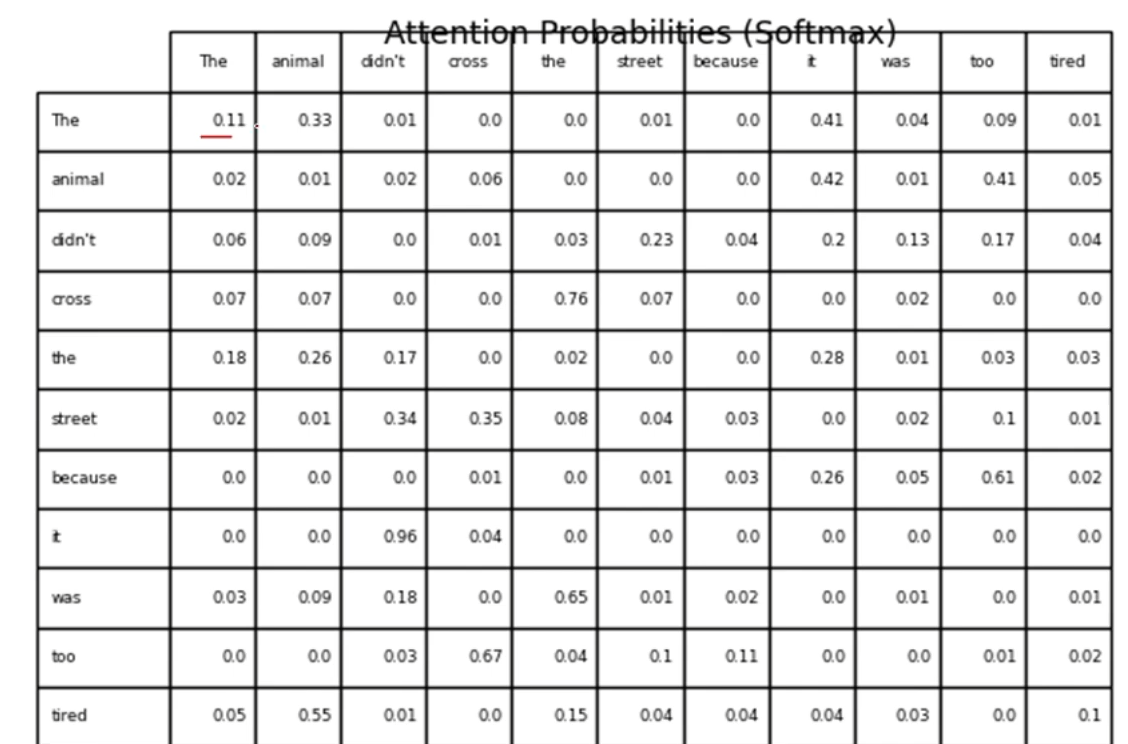

In [23]:
new_v=np.matmul(attention,v)

In [24]:
new_v

array([[-6.33113921e-01,  3.08483352e-01,  1.01281594e-02,
         2.01702182e-02,  2.18483824e-01,  7.03534588e-01],
       [-1.58275800e-01, -8.85491568e-02, -3.35172651e-01,
        -1.09517396e-02,  1.38863871e-01,  4.40846645e-01],
       [-1.40001172e-01,  8.01125383e-02,  1.77373609e-01,
         5.64956746e-01,  2.28908597e-01,  1.92188729e-01],
       [ 7.57338738e-02, -1.09102504e-01,  4.88420347e-02,
         7.32913791e-02,  1.80585432e-01,  2.00188835e-01],
       [ 7.57129483e-01, -1.88130432e-01, -4.55823125e-01,
         9.45304461e-02,  3.59358028e-01,  5.50558491e-01],
       [ 2.21697027e-01,  8.34268558e-02,  1.84945233e-02,
         6.18623061e-01,  3.16132132e-01,  3.54409436e-01],
       [-1.92420700e-01, -1.05286443e-02, -2.86965273e-04,
         1.41564412e-01,  1.02970147e-01,  3.01537917e-01],
       [-1.34960749e-01,  7.66423096e-02,  1.02391258e-02,
         5.01916119e-01,  2.58651332e-01,  3.26631005e-01],
       [-3.81983963e-02,  1.97442007e-01, -1.519

## Now we have to understand the self attention with masking

The mask in the Scaled Dot-Product Attention equation is used in decoder self-attention to prevent a token from “seeing” future tokens.
This ensures that, when predicting the next word, the model only uses past and current words — preserving the autoregressive property.


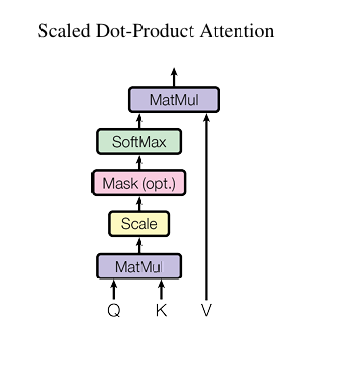


## with masking the formula will be


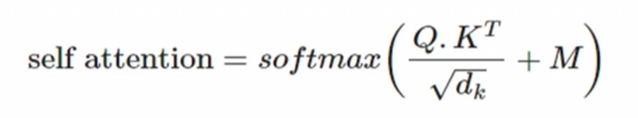


**This means token i can attend to all tokens ≤ i (itself and previous tokens).**

In [27]:
mask=np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

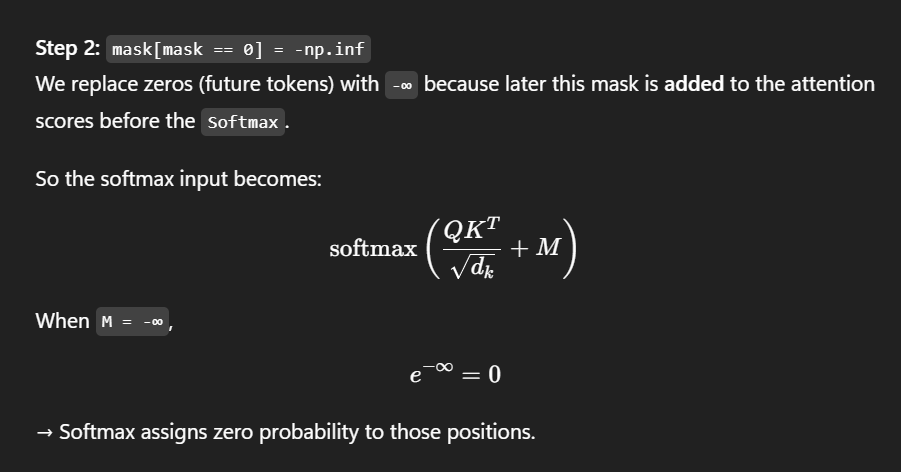

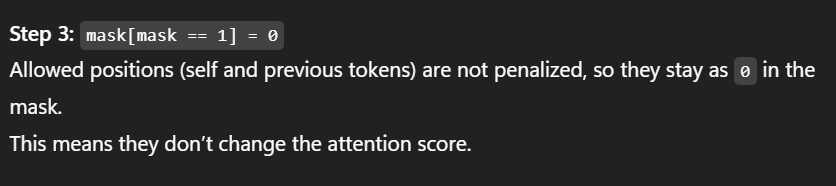

In [29]:
mask[mask==0]=-np.inf
mask[mask==1]=0

In [30]:
mask

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [31]:
at_mask=scaled+mask

In [32]:
attention_mask=softmax(at_mask)

In [33]:
attention_mask

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.65461288, 0.34538712, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.17469721, 0.53951324, 0.28578954, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.48583652, 0.13590453, 0.29851523, 0.07974372, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.32638497, 0.01647428, 0.22015441, 0.27963977, 0.15734658,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.10350274, 0.02997334, 0.03463989, 0.11342179, 0.39343353,
        0.32502871, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.15705693, 0.12856095, 0.25080043, 0.0214951 , 0.

In [34]:
new_v_mask=np.matmul(attention_mask,v)

In [35]:
new_v_mask

array([[ 7.14173185e-01, -3.89897518e-01, -2.74805070e-01,
        -2.63589152e+00,  6.51343785e-01, -1.44001563e-01],
       [ 5.65375933e-01, -4.58428307e-01,  3.94324170e-01,
        -1.39157234e+00,  5.48561174e-01, -3.55108926e-01],
       [ 1.63319333e-01, -5.26997461e-01,  5.86251267e-01,
         2.73823011e-01,  3.10182666e-01, -4.59554485e-01],
       [ 3.16563926e-01, -4.17111316e-01, -2.89002907e-01,
        -7.61611937e-01,  4.19689882e-01, -6.99253759e-02],
       [ 2.57857033e-01, -1.94814097e-01, -5.41945985e-01,
         1.16196004e-01,  4.90913311e-01,  2.27797052e-01],
       [ 5.12943652e-01, -3.94223770e-01, -3.65222972e-01,
         6.55115452e-01,  9.12290264e-01, -3.38577804e-01],
       [-8.34786566e-02, -3.61165915e-01,  5.99969048e-02,
        -6.23252032e-02,  2.01197172e-01, -2.58168266e-01],
       [ 7.01854911e-02, -8.13781481e-02,  2.69594956e-01,
         8.44857964e-01,  3.90768903e-01, -2.42505824e-02],
       [ 6.47080682e-02,  8.70492778e-02, -2.718